In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [102]:
kraken2_report_f = "/home/Users/yl181/ww_pathogen/test_data/Zymo_illumina/SRR11207265.downsampled.report"

In [103]:
kraken2_df = pd.read_csv(kraken2_report_f,
                         sep='\t',
                         names=['Abundance', 'Inclusive Counts', "Counts", 'Rank', 'TaxID', 'TaxName'])

In [104]:
total_count = kraken2_df[(kraken2_df['TaxID'] <= 1)]['Inclusive Counts'].sum()
total_count

500871

In [82]:
species_count = kraken2_df[kraken2_df['Rank'] == 'S'].shape[0]
species_count

2312

In [83]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [84]:
species_count_df = kraken2_df[kraken2_df['Rank'] == 'S']

Text(0, 0.5, 'Count of Species')

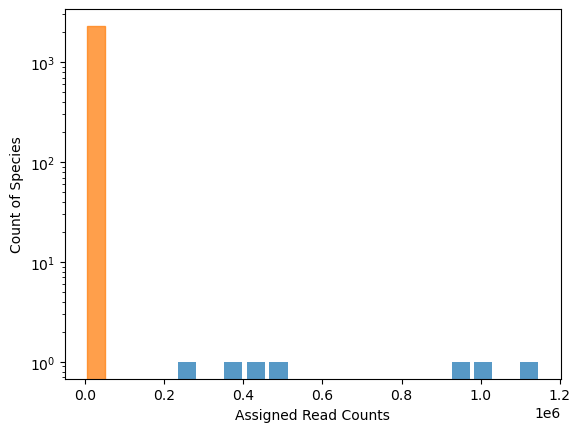

In [85]:
n, bins, patches = plt.hist(species_count_df['Inclusive Counts'], 20, density=False, facecolor=sns.color_palette()[0], alpha=0.75, log=True, rwidth=0.8)
patches[0].set_color(sns.color_palette()[1])
plt.xlabel('Assigned Read Counts')
plt.ylabel('Count of Species')

In [104]:
kraken2_df['Rank'].unique()

array(['U', 'R', 'R1', 'D', 'P', 'C', 'O', 'F', 'G', 'S', 'S1', 'S2',
       'S3', 'S4', 'G1', 'G2', 'F1', 'F2', 'F3', 'C1', 'C2', 'O1', 'P1',
       'D1', 'O2', 'D2', 'D3', 'K', 'K1', 'K2', 'K3', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'C3', 'C4', 'O3', 'O4', 'R2', 'R3'],
      dtype=object)

In [140]:
ranks = ['R', 'D', 'P', 'C', 'O', 'F', 'G', 'S']

In [141]:
rank_counts = []
for rank in ranks:
    rank_counts.append(kraken2_df[kraken2_df['Rank']==rank]['Inclusive Counts'].sum()/total_count)

/home/Users/yl181/miniconda3/envs/ww_pathogen/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Cumulative Abundance')

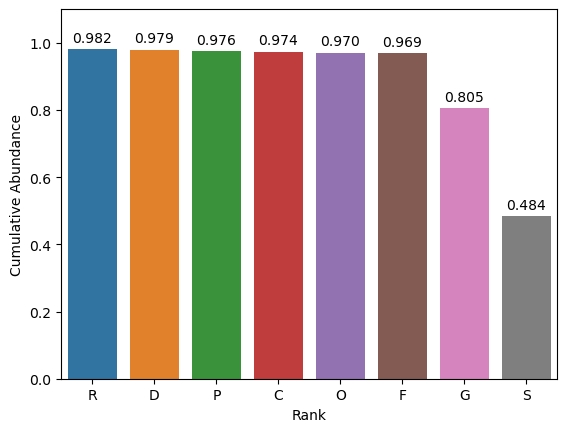

In [142]:
plots = sns.barplot(np.arange(len(ranks)), rank_counts, label=ranks)

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                    textcoords='offset points')
    
plt.xticks(np.arange(len(ranks)), ranks)
plt.ylim(0,1.1)
plt.xlabel('Rank')
plt.ylabel('Cumulative Abundance')

In [88]:
0.0005*1e8

50000.0

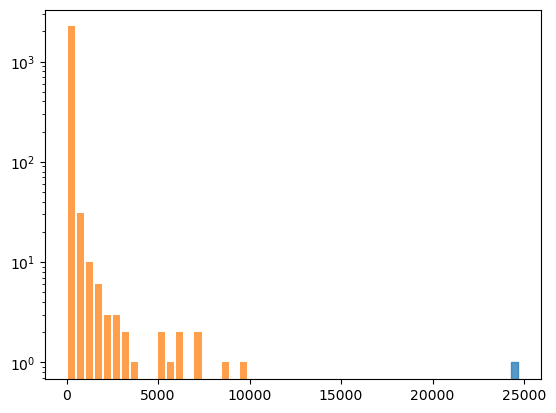

In [69]:
species_count_df = kraken2_df[(kraken2_df['Rank'] == 'S') & (kraken2_df['Inclusive Counts'] <= 0.2*1e6)]
n, bins, patches = plt.hist(species_count_df['Inclusive Counts'], 50, density=False, facecolor=sns.color_palette()[1], log=True, rwidth=0.8, alpha=0.75)
patches[-1].set_color(sns.color_palette()[0])

In [103]:
0.0005*total_count

5002.6795

In [65]:
species_rank_abundace = kraken2_df[kraken2_df['Rank'] == 'S']['Inclusive Counts'].sum()/total_count
species_rank_abundace

0.48386789519496504

In [78]:
abundance_threshold = 0.2
kraken2_df[(kraken2_df['Rank'] == 'S') & (kraken2_df['Abundance'] >= abundance_threshold)]['Inclusive Counts'].sum()/total_count

0.46463740081690225

In [79]:
total_count*abundance_threshold/100

20010.718

In [80]:
species_count = kraken2_df[(kraken2_df['Rank'] == 'S') & (kraken2_df['Abundance'] >= abundance_threshold)]
species_count

,Abundance,Inclusive Counts,Counts,Rank,TaxID,TaxName
9,11.50,1150349,990794,S,28901,Salmonella enterica
453,4.34,433832,411910,S,562,Escherichia coli
1206,9.34,934062,925326,S,287,Pseudomonas aeruginosa
3086,0.25,24746,21751,S,1423,Bacillus subtilis
3415,2.75,275127,270397,S,1280,Staphylococcus aureus
3544,4.75,475057,468718,S,1639,Listeria monocytogenes
3734,9.90,990241,983352,S,1351,Enterococcus faecalis
3784,3.65,365450,364261,S,1613,Limosilactobacillus fermentum


In [49]:
species_count.shape

(17, 6)

In [43]:
ground_truth = "/home/Users/yl181/ww_pathogen/test_data/Zymo_illumina/theoretical_composition.txt"

In [44]:
ground_truth_taxname = []
with open(ground_truth, "r") as ground_truth_input:
    for line in ground_truth_input.readlines():
        ground_truth_taxname.append(line.split(" - ")[0])

In [45]:
labels = []
for idx, row in species_count.iterrows():
    if row['TaxName'].strip() in ground_truth_taxname:
        labels.append("TP")
    else:
        labels.append("FP")
species_count['Label'] = labels
species_count

/tmp/ipykernel_2481/2114906650.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  species_count['Label'] = labels


,Abundance,Inclusive Counts,Counts,Rank,TaxID,TaxName,Label
9,11.54,57795,49715,S,28901,Salmonella enterica,TP
281,0.05,263,238,S,54736,Salmonella bongori,FP
293,4.38,21929,20849,S,562,Escherichia coli,TP
406,0.09,439,438,S,208962,Escherichia albertii,FP
408,0.07,374,374,S,1499973,Escherichia marmotae,FP
409,0.07,348,348,S,564,Escherichia fergusonii,FP
411,0.05,256,256,S,2044467,Escherichia sp. E4742,FP
415,0.02,118,118,S,546,Citrobacter freundii,FP
452,0.06,291,245,S,623,Shigella flexneri,FP
461,0.03,157,150,S,621,Shigella boydii,FP


In [46]:
ground_truth_taxname

['Listeria monocytogenes',
 'Pseudomonas aeruginosa',
 'Bacillus subtilis',
 'Escherichia coli',
 'Salmonella enterica',
 'Limosilactobacillus fermentum',
 'Enterococcus faecalis',
 'Staphylococcus aureus',
 'Saccharomyces cerevisiae',
 'Cryptococcus neoformans']

In [30]:
results = pd.read_csv("/home/Users/yl181/ww_pathogen/zymo_benchmark.csv")

In [31]:
results.shape[0]

16

In [32]:
results

,Taxonomy ID,Assembly Accession ID,Source Database,Is Representative,Assembly Level,Organism of Assembly,Strain,Downloaded,Species,Breadth Coverage,...,Coverage Score,Depth Coverage,BC2,EC2,CS2,DC2,Consensus ANI,Combined CS2 and ANI (Sqrt(ANI)xCS2x100),Presence/Absence,Label
0,287,GCF_000006765.1,PathoGenesis Corporation,True,Complete Genome,Pseudomonas aeruginosa PAO1,PAO1,True,Pseudomonas aeruginosa,0.961950,...,0.961950,91.948339,0.961762,1.000000,0.961762,90.982172,0.994630,95.92,Present,TP
1,1639,GCF_000196035.1,European Consortium,True,Complete Genome,Listeria monocytogenes EGD-e,EGD-e,True,Listeria monocytogenes,0.916307,...,0.916307,48.723171,0.915434,1.000000,0.915434,47.403522,0.950276,89.24,Present,TP
2,1280,GCF_000013425.1,University of Oklahoma Health Sciences Center,True,Complete Genome,Staphylococcus aureus subsp. aureus NCTC 8325,NCTC 8325,True,Staphylococcus aureus,0.911987,...,0.911987,66.014859,0.910659,1.000000,0.910659,64.903952,0.992125,90.71,Present,TP
3,28901,GCF_000006945.2,Washington University Genome Sequencing Center,True,Complete Genome,Salmonella enterica subsp. enterica serovar Ty...,LT2,True,Salmonella enterica,0.913935,...,0.913935,163.220999,0.908828,1.000000,0.908828,128.251264,0.989613,90.41,Present,TP
4,1351,GCF_001598635.1,NCBI RefSeq,False,Complete Genome,Enterococcus faecalis,LD33,True,Enterococcus faecalis,0.882816,...,0.882816,103.992537,0.881071,1.000000,0.881071,103.371701,0.991285,87.72,Present,TP
5,1613,GCF_022819245.1,NCBI RefSeq,True,Complete Genome,Limosilactobacillus fermentum,SCB0035,True,Limosilactobacillus fermentum,0.848282,...,0.848282,56.632296,0.847420,1.000000,0.847420,56.268086,0.993590,84.47,Present,TP
6,1423,GCF_000009045.1,BSNR,True,Complete Genome,Bacillus subtilis subsp. subtilis str. 168,168,True,Bacillus subtilis,0.846491,...,0.846491,50.475193,0.736654,1.000000,0.736654,22.571987,0.937582,71.33,Absent,TP
7,623,GCF_000006925.2,Microbial Genome Center of ChMPH,True,Complete Genome,Shigella flexneri 2a str. 301,301,True,Shigella flexneri,0.801744,...,0.801744,167.148873,0.708436,1.000000,0.708436,61.521117,0.986342,70.36,Present,FP
8,562,GCF_000008865.2,GIRC,True,Complete Genome,Escherichia coli O157:H7 str. Sakai,Sakai substr. RIMD 0509952,True,Escherichia coli,0.764964,...,0.764964,163.814285,0.664840,1.000000,0.664840,64.188399,0.985090,65.99,Present,TP
9,72361,GCF_003667885.1,NCBI RefSeq,True,Complete Genome,Bacillus vallismortis,Bac111,True,Bacillus vallismortis,0.862481,...,0.862481,50.133371,0.657436,0.999996,0.657439,18.744287,0.937691,63.66,Absent,FP


In [33]:
results.columns

Index(['Taxonomy ID', 'Assembly Accession ID', 'Source Database',
       'Is Representative', 'Assembly Level', 'Organism of Assembly', 'Strain',
       'Downloaded', 'Species', 'Breadth Coverage', 'Expected Coverage',
       'Coverage Score', 'Depth Coverage', 'BC2', 'EC2', 'CS2', 'DC2',
       'Consensus ANI', 'Combined CS2 and ANI (Sqrt(ANI)xCS2x100)',
       'Presence/Absence', 'Label'],
      dtype='object')

In [34]:
sns.set(font_scale=1.2)

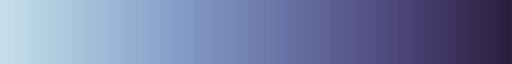

In [35]:
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

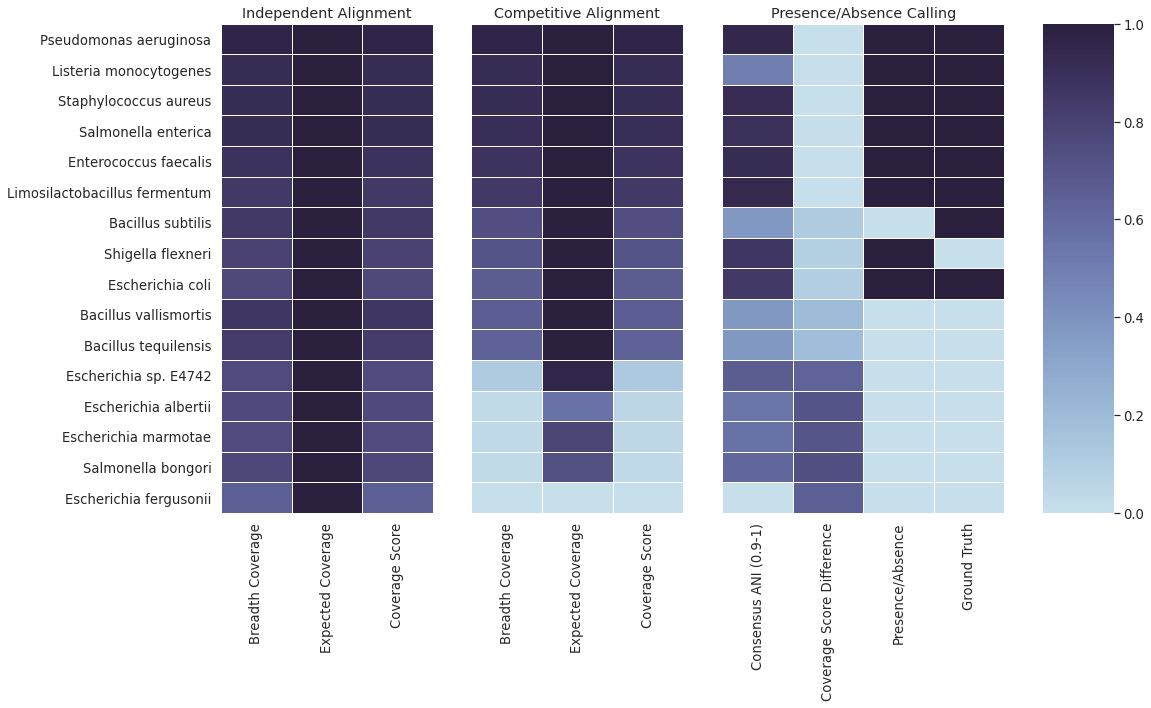

In [36]:
color = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
fig, axs = plt.subplots(1,4,figsize=(16,9), gridspec_kw={'width_ratios': [3, 3, 4, 1]})

df_0 = copy.deepcopy(results[['Breadth Coverage', 'Expected Coverage', 'Coverage Score']])

sns.heatmap(df_0, ax=axs[0], cbar=False, cbar_kws={'shrink': 0.6},
            cmap=color,
            square=False,
            vmin=0, vmax=1,
            linewidths=1,
            yticklabels=results['Species'].to_list())

axs[0].set_title('Independent Alignment')
df_1 = copy.deepcopy(results[['BC2', 'EC2', 'CS2']])

sns.heatmap(df_1, ax=axs[1], cbar=True, cbar_ax=axs[3], cbar_kws={'shrink': 0.6},
            cmap=color,
            square=False,
            vmin=0, vmax=1,
            linewidths=1,
            yticklabels=False,
            xticklabels=df_0.columns.to_list())

axs[1].set_title('Competitive Alignment')
df_2 = copy.deepcopy(results[['Consensus ANI']])

CS1_CS2_diff = []
presents = []
tps = []
ani90s = []

for idx, row in results.iterrows():
    CS1_CS2_diff.append(row['Coverage Score']-row['CS2'])
    if row['Presence/Absence'] == 'Present':
        presents.append(1)
    else:
        presents.append(0)
    if row['Label'] == 'TP':
        tps.append(1)
    else:
        tps.append(0)
    
    ani90 = (row['Consensus ANI'] - 0.9)/0.1
    if ani90 < 0:
        ani90 = 0
    ani90s.append(ani90)
    
        
df_2['Coverage Score Difference'] = CS1_CS2_diff
df_2['Presence/Absence'] = presents
df_2['Ground Truth'] = tps
df_2['Consensus ANI'] = ani90s

sns.heatmap(df_2, ax=axs[2], cbar=False, cbar_kws={'shrink': 0.6},
            cmap=color,
            square=False,
            vmin=0, vmax=1,
            linewidths=1,
            yticklabels=False,
            xticklabels=['Consensus ANI (0.9-1)'] + df_2.columns[1:].to_list())
axs[2].set_title('Presence/Absence Calling')
fig.show()

In [18]:
axs

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

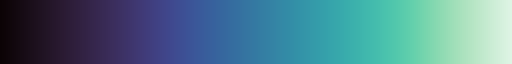

In [107]:
results = pd.read_csv("/home/Users/yl181/seqscreen_nano/output_datasets/ZymoBIOMICS.STD.Even.ont.seqscreen/taxonomic_identification/taxonomic_assignment/alignment.csv")

In [108]:
results

,Taxonomy ID,Assembly Accession ID,Source Database,Is Representative,Assembly Level,Organism of Assembly,Strain,Downloaded,Species,Breadth Coverage,Expected Coverage,Coverage Score,Depth Coverage,BC2,EC2,CS2,DC2,Consensus ANI
0,96241,GCF_006094475.1,NCBI RefSeq,True,Complete Genome,Bacillus subtilis subsp. spizizenii ATCC 6633 ...,ATCC 6633,True,Bacillus spizizenii,1.000000,1.000000,1.000000,28.817028,1.000000,1.000000,1.000000,28.435225,0.999993
1,287,GCF_000006765.1,PathoGenesis Corporation,True,Complete Genome,Pseudomonas aeruginosa PAO1,PAO1,True,Pseudomonas aeruginosa,0.969225,0.999858,0.969363,9.133267,0.969233,0.999831,0.969397,8.957587,0.995790
2,5207,GCA_022832995.1,Broad Institute,False,Complete Genome,Cryptococcus neoformans,VNII,True,Cryptococcus neoformans,0.423306,0.441691,0.958376,1.376761,0.423340,0.441638,0.958569,1.376418,0.864170
3,1639,GCF_000196035.1,European Consortium,True,Complete Genome,Listeria monocytogenes EGD-e,EGD-e,True,Listeria monocytogenes,0.943656,1.000000,0.943656,29.246736,0.932411,1.000000,0.932411,26.446730,0.962211
4,28901,GCF_000006945.2,Washington University Genome Sequencing Center,True,Complete Genome,Salmonella enterica subsp. enterica serovar Ty...,LT2,True,Salmonella enterica,0.929463,1.000000,0.929463,20.590929,0.925799,0.999995,0.925804,13.176773,0.992369
5,1280,GCF_000013425.1,University of Oklahoma Health Sciences Center,True,Complete Genome,Staphylococcus aureus subsp. aureus NCTC 8325,NCTC 8325,True,Staphylococcus aureus,0.923386,1.000000,0.923386,27.298416,0.923337,1.000000,0.923337,26.221774,0.993944
6,4932,GCF_000146045.2,Saccharomyces Genome Database,True,Complete Genome,Saccharomyces cerevisiae S288C,S288C,True,Saccharomyces cerevisiae,0.619563,0.678052,0.913740,1.829052,0.619487,0.677297,0.914646,1.825484,0.976131
7,1351,GCF_001598635.1,NCBI RefSeq,False,Complete Genome,Enterococcus faecalis,LD33,True,Enterococcus faecalis,0.894675,1.000000,0.894675,26.467055,0.894216,1.000000,0.894216,25.709091,0.993251
8,1613,GCF_022819245.1,NCBI RefSeq,True,Complete Genome,Limosilactobacillus fermentum,SCB0035,True,Limosilactobacillus fermentum,0.863003,1.000000,0.863003,34.935137,0.863029,1.000000,0.863029,34.607012,0.995154
9,562,GCF_000008865.2,GIRC,True,Complete Genome,Escherichia coli O157:H7 str. Sakai,Sakai substr. RIMD 0509952,True,Escherichia coli,0.783966,1.000000,0.783966,20.741795,0.651192,0.990895,0.657175,7.212012,0.980826
